## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Initializations

### Constants

In [2]:
G = 6.6743E-11
N = 3

m_sun = 1.9891*10**30
m_mars = 6.39*10**23
m_earth = 5.972*10**24
m_vec = np.array([m_sun, m_mars, m_earth]) 

t = (365*24*3600) * 2           # seconds in two years
dt = 10000          
dt_baseline = dt*10e-3

### Initial Values

In [3]:
x_sun = np.array([0, 0, 0]) * 1000
x_mars = np.array([-1.515826990639941E+08, 1.938873525772750E+08, 7.781768685378343E+06]) * 1000
x_earth = np.array([-1.482478644654080E+08, -1.750593860804110E+07, 1.389212913746014E+03]) * 1000
x_vec = np.array([x_sun, x_mars, x_earth])

v_sun = np.array([0, 0, 0]) * 1000
v_mars = np.array([-1.817315960942974E+01, -1.286106056730962E+01, 1.762372061258093E-01]) * 1000
v_earth = np.array([3.020390249534876E+00, -2.969860482268966E+01, 8.018100078537316E-04]) * 1000
v_vec = np.array([v_sun, v_mars, v_earth])

## Functions

In [4]:
def f_true(r, v, m, t_vec):
    """ 
    Returns the true velocity and acceleration of the bodies
    """
    a = np.zeros((N, 3))
    for i in range(N):
        for j in range(N):
            if (i != j):
                a[i] = a[i] + G*m[j]*(r[j] - r[i]) / np.linalg.norm(r[j] - r[i])**3
    u_dot_r = v
    u_dot_v = a

    return u_dot_r, u_dot_v

In [5]:
def RK4(r, v, m, T, dt):
    """ 
    Returns the position and velocity at the next time step via the fourth-order Runge-Kutta method
    """
    t_vec = np.arange(0, T, dt)
    x = np.zeros((int(t/dt) + 1, *x_vec.shape))
    v = np.zeros((int(t/dt) + 1, *v_vec.shape))
    x[0] = x_vec
    v[0] = v_vec
    
    for i in range(1, len(t_vec)):
        k1_r, k1_v = f_true(x[i-1], v[i-1], m, t_vec[i-1])
        k2_r, k2_v = f_true(x[i-1] + k1_r/2, v[i-1] + k1_v/2, m, t_vec[i-1] + dt/2)
        k3_r, k3_v = f_true(x[i-1] + k2_r/2, v[i-1] + k2_v/2, m, t_vec[i-1] + dt/2)
        k4_r, k4_v = f_true(x[i-1] + k3_r, v[i-1] + k3_v, m, t_vec[i-1] + dt)
        x[i] = x[i-1] + (dt / 6) * (k1_r + 2*k2_r + 2*k3_r + k4_r)
        v[i] = v[i-1] + (dt / 6) * (k1_v + 2*k2_v + 2*k3_v + k4_v)
    
    return x, v

In [6]:
def RK4_error(r, v, m, t, dt, dt_baseline):
    """ 
    Returns the error of the estimated function
    """
    x, v = RK4(r, v, m, t, dt)
    x_b, v_b = RK4(r, v, m, t, dt_baseline)

    err_x = np.linalg.norm(x[-1,:] - x_b[-1,:]) / np.linalg.norm(x_b[-1,:])
    err_v = np.linalg.norm(v[-1,:] - v_b[-1,:]) / np.linalg.norm(v_b[-1,:])
    return err_x, err_v

## Running the Model

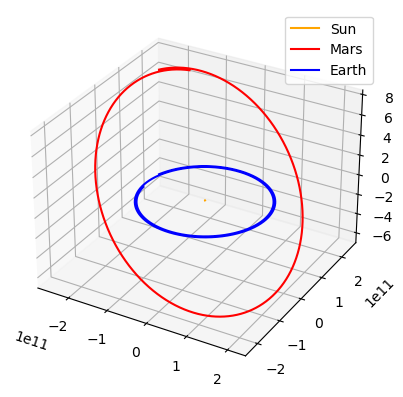

In [7]:
x, v = RK4(x_vec, v_vec, m_vec, t, dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:,0,0], x[:,0,1], x[:,0,2], label='Sun', color = 'orange')
ax.plot(x[:,1,0], x[:,1,1], x[:,1,2], label='Mars', color = 'red')
ax.plot(x[:,2,0], x[:,2,1], x[:,2,2], label='Earth', color = 'blue')
ax.legend()
plt.show()